In [1]:
#Reference : https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

#pd.pandas.set_option('display.max_rows',None) -- > Will show all the rows


import pandas as pd
import numpy as np
from IPython.display import display, Image

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# Scikit-learn packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Machine Learning packages
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor,ExtraTreesRegressor
#from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [3]:
dataset=pd.read_csv('drive/My Drive/Predict_Loan_Amount/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(30000, 24)


#Pre-Processing

In [4]:
dataset.head(10)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,N,2.0,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,Y,2.0,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,N,2.0,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,155.95,N,Y,3.0,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,500.20,N,N,2.0,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


###Removing spaces from column names and replacing by"_"

In [5]:
dataset.columns = dataset.columns.str.replace(' ', '_') # replacing space in column name with "_"
dataset.columns = dataset.columns.str.replace('(', '') #replacing "(" with blank in column name
dataset.columns = dataset.columns.str.replace(')', '')#replacing ")" with blank in column name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


###Deleting the rows where Target varible(Loan_Sanction_Amount_USD) is "-999"

In [6]:
dataset = dataset[dataset.Loan_Sanction_Amount_USD != -999]

###Deleting the rows where Target varible(Loan_Sanction_Amount_USD) is "NaN"

In [7]:
dataset = dataset[~(dataset["Loan_Sanction_Amount_USD"].isnull()==True)]
dataset = dataset.reset_index(drop=True)

###Droping the columns which are not useful i.e. (['Customer_ID', 'Name','Property_ID']) 

In [8]:
dataset = dataset.drop(['Customer_ID', 'Name','Property_ID'], axis = 1)

###Now Checking the final shape of the dataset

In [9]:
dataset.shape


(29322, 21)

###Now replacing "-999" with NaN in the whole dataset

In [10]:
dataset=dataset.replace(-999,np.NaN)

#**EDA**

In [11]:
dataset.describe()

,Age,Income_USD,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
count,29322.000000,2.491100e+04,29322.000000,28990.000000,26920.000000,27681.000000,29322.000000,2.464900e+04,29322.000000,29162.000000,2.898900e+04,29322.000000
mean,40.119910,2.631891e+03,88779.817302,409.082148,2.254049,739.898843,0.193984,2.632181e+03,2.459928,0.853645,1.332445e+05,48210.120452
std,16.054988,1.137630e+04,59469.836598,217.613817,0.951468,72.168172,0.395423,1.143538e+04,1.118738,0.353468,9.280234e+04,48212.938805
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.000000,0.000000,3.777000e+02,1.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1.650435e+03,41182.645000,250.677500,2.000000,681.870000,0.000000,1.649830e+03,1.000000,1.000000,6.193793e+04,0.000000
50%,40.000000,2.222860e+03,75094.785000,376.350000,2.000000,739.910000,0.000000,2.223610e+03,2.000000,1.000000,1.112606e+05,36064.225000
75%,55.000000,3.090330e+03,119895.552500,522.307500,3.000000,799.120000,0.000000,3.090870e+03,3.000000,1.000000,1.800423e+05,74779.277500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [12]:
dataset.isna().sum()

Gender                         51
Age                             0
Income_USD                   4411
Income_Stability             1628
Profession                      0
Type_of_Employment           7125
Location                        0
Loan_Amount_Request_USD         0
Current_Loan_Expenses_USD     332
Expense_Type_1                  0
Expense_Type_2                  0
Dependents                   2402
Credit_Score                 1641
No._of_Defaults                 0
Has_Active_Credit_Card       1521
Property_Age                 4673
Property_Type                   0
Property_Location             341
Co-Applicant                  160
Property_Price                333
Loan_Sanction_Amount_USD        0
dtype: int64

**Observations from above:**

1) Income_USD,Loan_Amount_Request_USD,Property Age,Dependents and Current_Loan_Expenses_USD have some outliers. We will handle this in our later analysis.

2) There are also some null values which we will analyse it further.

##**Missing Values**

In [13]:
#Making the list of the features that have missing values
all_features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

#Getting the % of missing values in different features
for feature in all_features_with_na:
    print(feature+" have "+str(np.round(dataset[feature].isnull().mean()*100, 2))+ '  % missing values')

Gender have 0.17  % missing values
Income_USD have 15.04  % missing values
Income_Stability have 5.55  % missing values
Type_of_Employment have 24.3  % missing values
Current_Loan_Expenses_USD have 1.13  % missing values
Dependents have 8.19  % missing values
Credit_Score have 5.6  % missing values
Has_Active_Credit_Card have 5.19  % missing values
Property_Age have 15.94  % missing values
Property_Location have 1.16  % missing values
Co-Applicant have 0.55  % missing values
Property_Price have 1.14  % missing values


**Obsevation :**
 There are 12 variabes out of 20 varibales which have NaN values.

 Amoung all these "Type_of_Employment" have 24.3% ,"Income_USD" have 15.04% and "Property_Age" have 15.94% of missing values which we have to consider it carefully.

###**Now lets check the relation between the missing values and the target variable(Loan_Sanction_Amount_USD) (Note : Here 1 is for NaN and 0 otherwise)**

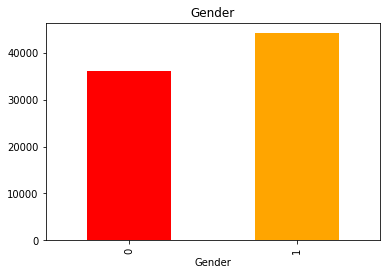

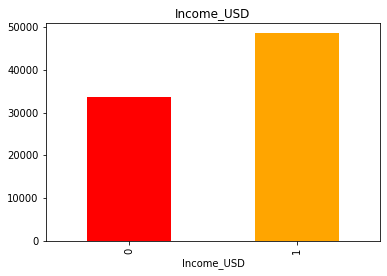

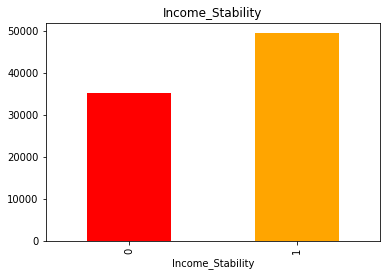

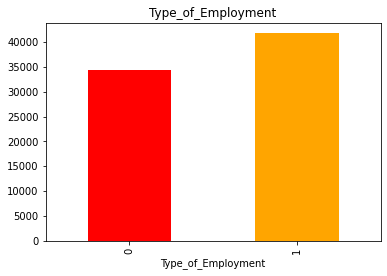

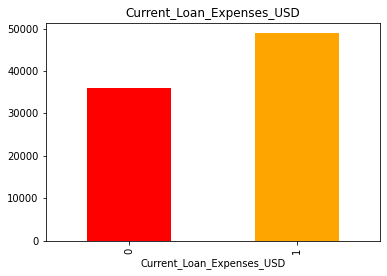

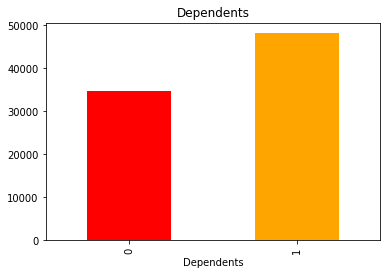

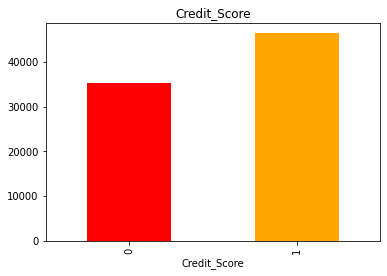

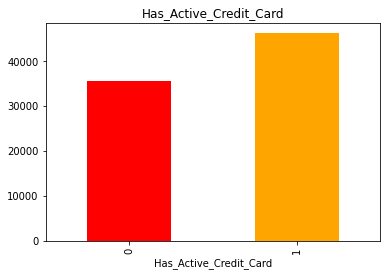

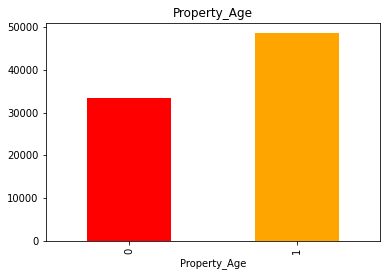

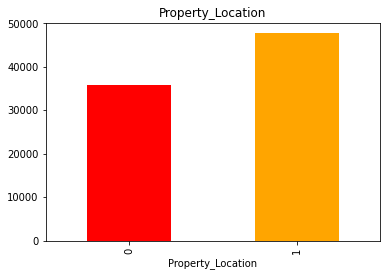

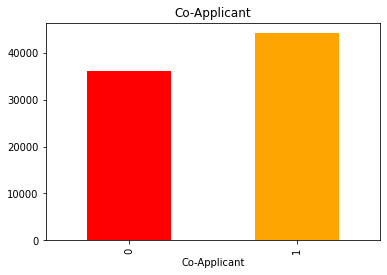

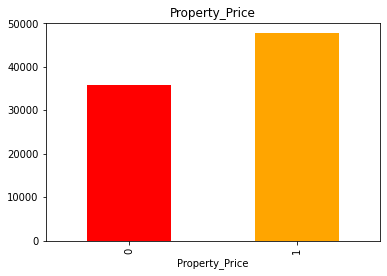

In [14]:
c = ['red', 'orange', 'gray', 'blue', 'green','cyan']

for feature in all_features_with_na:
    dataset_copy = dataset.copy()#Creating the copy of dataset
    
    # Wherever the feature have NULL value we will replace it with 1 and 0 otherwise
    dataset_copy[feature] = np.where(dataset_copy[feature].isnull(), 1, 0)
    
    # Now lets calculate the median of "Loan_Sanction_Amount_USD" for the features that are missing as well as non missing features
    dataset_copy.groupby(feature)['Loan_Sanction_Amount_USD'].median().plot.bar(color=c)
    plt.title(feature)
    plt.show()

**Observation :**

Here relation between the missing values and the dependent variable is clearly visible. So we need to replace the "NaN" values with something meaningful.

###**Analysis on Numerical Variables:**

In [15]:
# making a list of numerical features
Numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(Numerical_features))
dataset[Numerical_features].head()

Number of numerical variables:  12


,Age,Income_USD,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
0,56,1933.05,72809.58,241.08,3.0,809.44,0,1933.05,4,1.0,119933.46,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,4952.91,2,1.0,54791.00,37469.98
2,65,988.19,45593.04,171.95,1.0,833.15,0,988.19,2,0.0,72440.58,36474.43
3,65,NaN,80057.92,298.54,2.0,832.70,1,NaN,2,1.0,121441.51,56040.54
4,31,2614.77,113858.89,491.41,NaN,745.55,1,2614.77,4,1.0,208567.91,74008.28


###**Now Lets get the correlation between the numerical variables**

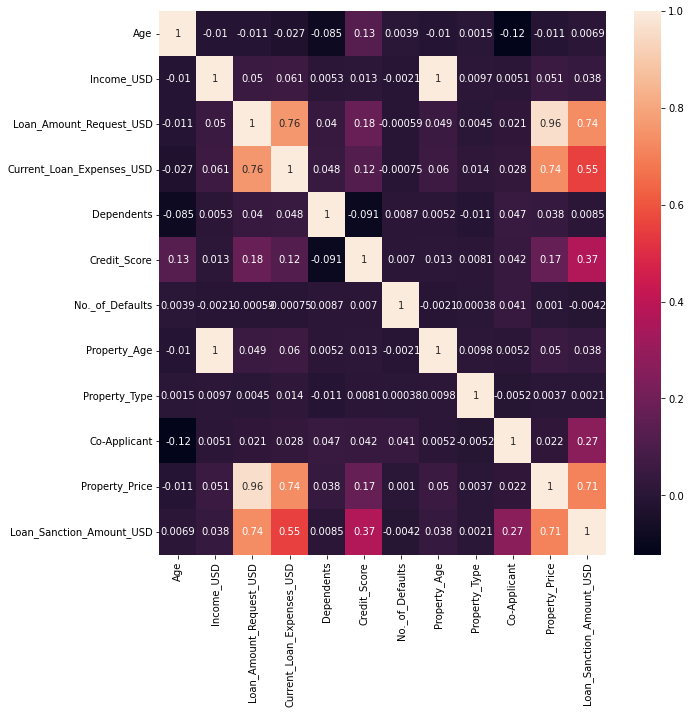

In [16]:
# Creating a heatmap for correlation between numerical features
plt.figure(figsize=(10, 10))
sns.heatmap(dataset[Numerical_features].corr(), annot=True)
plt.show()

###**Obsevations:**

From correlation matrix we can note that "Property Age" and "Income USD" both have the same values . So we can drop one of them.We will drop property Age in the later part

We can also observe that the features named "Property price " and "Loan amount request USD " have 0.96 collinearity. So we can make a new Feature with the ratio of Loan Amount Requested and Property Price or we can drop one of the feature.


###**Now we have 2 Types of numerical variables**
**1) Discrete**
**2) Continous**

###1) Discrete Variable

In [17]:
# If number of unique values in any feature are less than 25, then we can consider that feature as Discrete feature
discrete_feature=[feature for feature in Numerical_features if len(dataset[feature].unique())<25]

#discrete_feature=[]
#for feature in Numerical_features:
 # if len(dataset[feature].unique())>4 and len(dataset[feature].unique())<25:
   # discrete_feature.append(feature)

print("Discrete Features Count: {}".format(len(discrete_feature)))

Discrete Features Count: 4


In [18]:
discrete_feature

['Dependents', 'No._of_Defaults', 'Property_Type', 'Co-Applicant']

In [19]:
for i in discrete_feature:

  print(str(i) +" : "+str(dataset[i].unique()))

Dependents : [ 3.  1.  2. nan  4.  5.  8.  6.  7. 10. 14.]
No._of_Defaults : [0 1]
Property_Type : [4 2 1 3]
Co-Applicant : [ 1.  0. nan]


#**As the  number of Unique values for  No._of_Defaults is 2 and Co-Applicant is also 2 ,we can consider it as a Categorical data.**

#**Property Type is already a Categorical data with label encoding.**

In [20]:
dataset["No._of_Defaults"]=dataset["No._of_Defaults"].apply(str)
dataset["Property_Type"]=dataset["Property_Type"].apply(str)
dataset["Co-Applicant"]=dataset["Co-Applicant"].apply(str)

In [21]:
discrete_feature_updated=["Dependents"]

In [22]:
dataset[discrete_feature_updated].head()

,Dependents
0,3.0
1,1.0
2,1.0
3,2.0
4,NaN


**Now Finding the relation between Discrete features and Target variable**

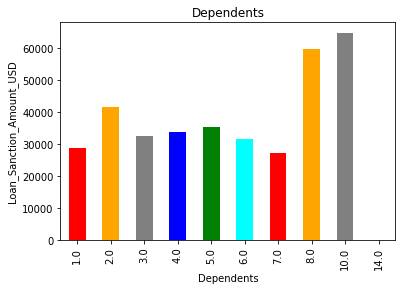

In [23]:
## Lets Find the realtionship between discrete variables and Target variable
c = ['red', 'orange', 'gray', 'blue', 'green','cyan']
for feature in discrete_feature_updated:
    dataset_copy=dataset.copy()
    dataset_copy.groupby(feature)['Loan_Sanction_Amount_USD'].median().plot.bar(color=c)
    plt.ylabel('Loan_Sanction_Amount_USD')
    plt.title(feature)
    plt.show()

**Obsevations :**

--> Number of Dependents  might be helpful as they show some proportionality with Target varibale.



###2) Continous Variable

In [24]:
#If the numerical varibale is not a discrete feature , then it is considered to be a continuous feature.
continuous_feature=[feature for feature in Numerical_features if feature not in discrete_feature]
print("Continuous features Count: {}".format(len(continuous_feature)))

Continuous features Count: 8


In [25]:
dataset[continuous_feature].head()

,Age,Income_USD,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Credit_Score,Property_Age,Property_Price,Loan_Sanction_Amount_USD
0,56,1933.05,72809.58,241.08,809.44,1933.05,119933.46,54607.18
1,32,4952.91,46837.47,495.81,780.40,4952.91,54791.00,37469.98
2,65,988.19,45593.04,171.95,833.15,988.19,72440.58,36474.43
3,65,NaN,80057.92,298.54,832.70,NaN,121441.51,56040.54
4,31,2614.77,113858.89,491.41,745.55,2614.77,208567.91,74008.28


###**Lets see the pair plot between continous features**

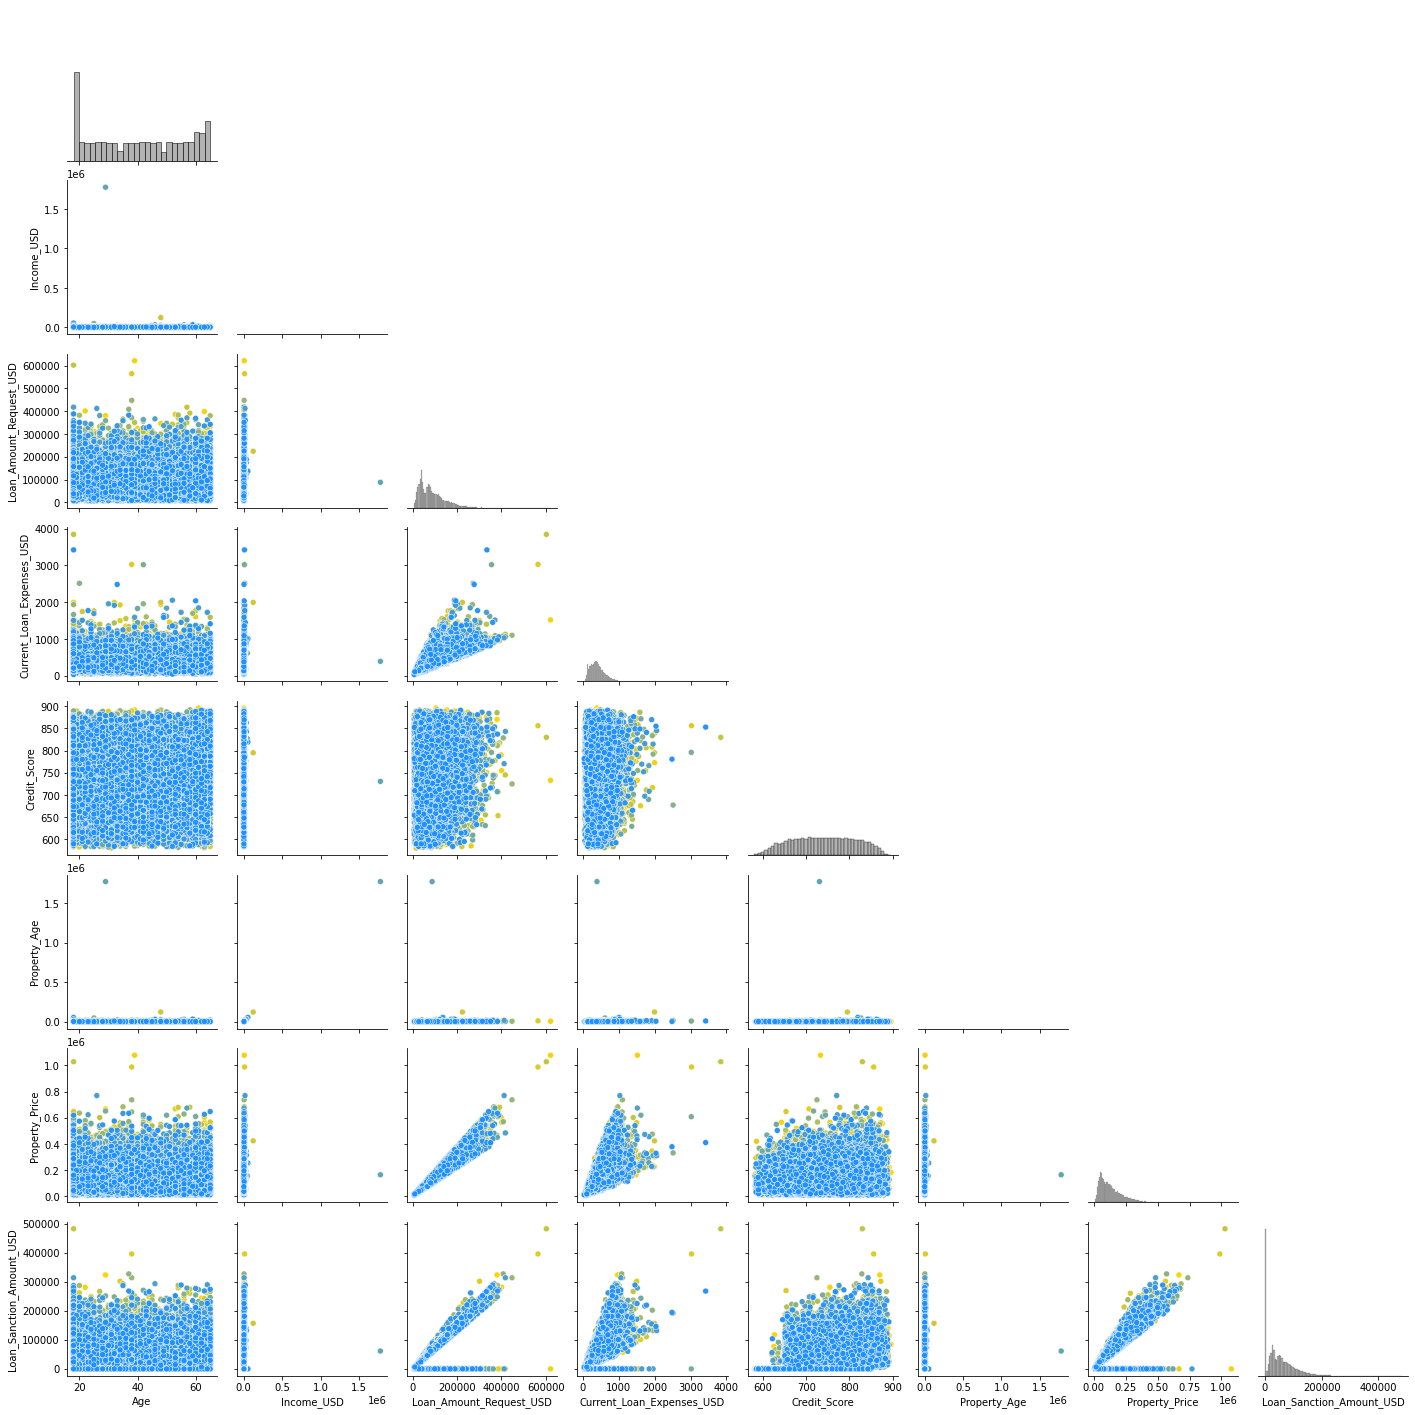

In [26]:

#https://stackoverflow.com/questions/68895009/have-gradient-colours-in-sns-pairplot-for-one-column-of-dataframe-so-that-i-can
sns.pairplot(
    dataset[continuous_feature],
    corner=True,
    diag_kws=dict(color=".6"),
    plot_kws=dict(
        hue=dataset[continuous_feature].index,
        palette="blend:gold,dodgerblue",
    ),
)

**Observation from pair plot**:

1) If Property price increases --> Loan_Amount_Request is also increasing

2) If Property price increases --> Current_Loan_Expenses is also increasing but there are some outliers that can be seen 

3) Property price and Loan_Amount_Request_USD are also monotonically increasing with Loan_Sanction_Amount_USD but they have some outliers.

**Distribution of Continuous variables:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

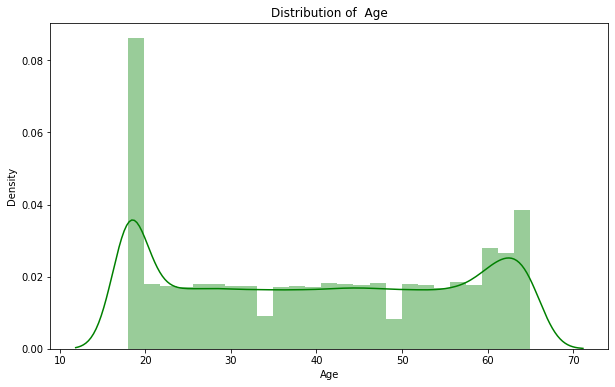

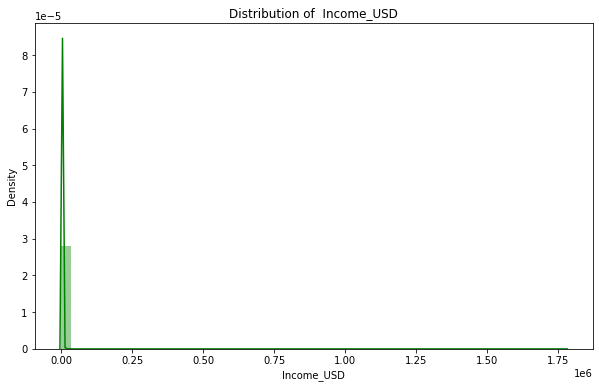

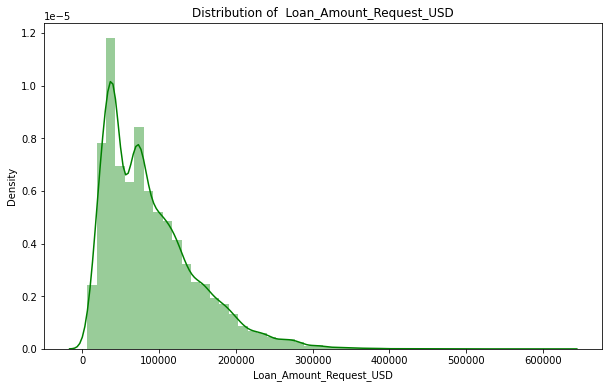

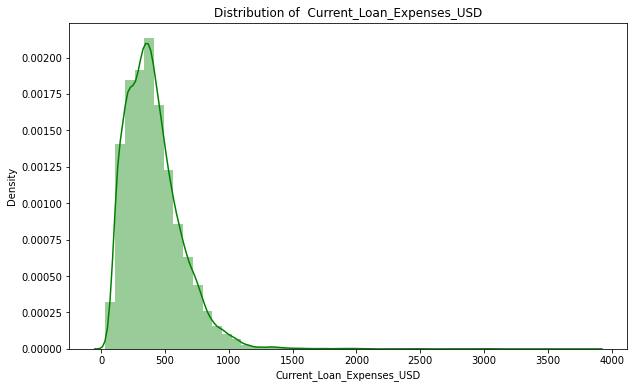

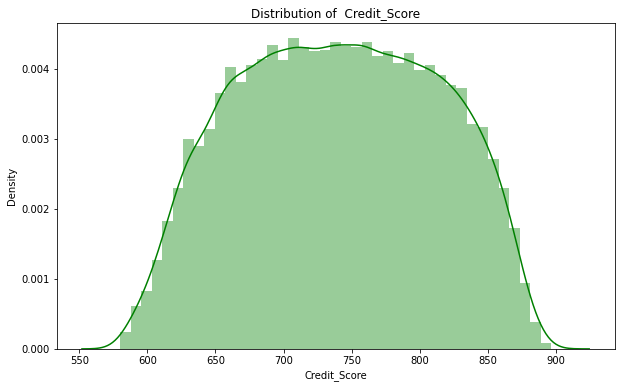

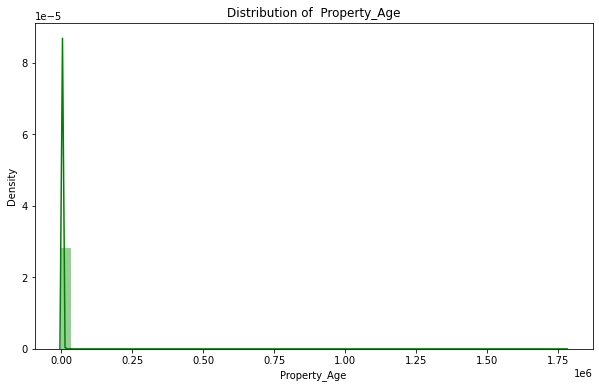

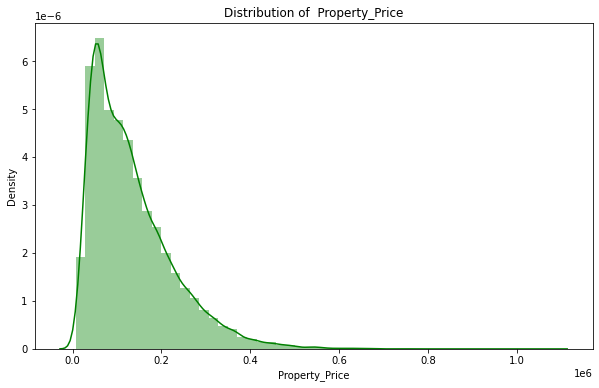

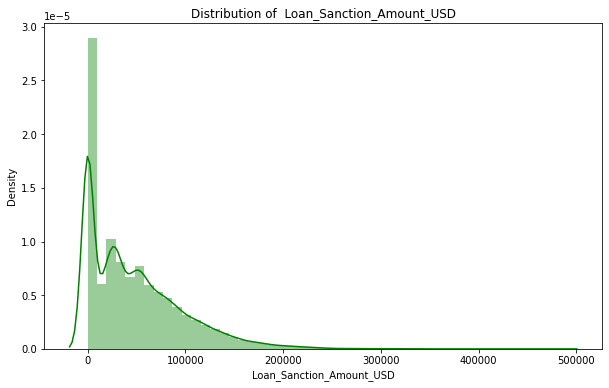

In [27]:
data_copy=dataset.copy()

for i in list(data_copy[continuous_feature].columns):
  plt.figure(figsize=(10,6))
  plt.title("Distribution of  "+ i)
  sns.distplot(data_copy[i], color = 'g')

**Observation:**

**1)Skewed Features:** "Loan_Amount_Request_USD" ,"Current_Loan_Expenses_USD","Property_Price"

**2)Symmetric feature  :** "Credit_Score"

###**Here we can note that many features have skewed distribution so now lets try to take Log transformation of this.**

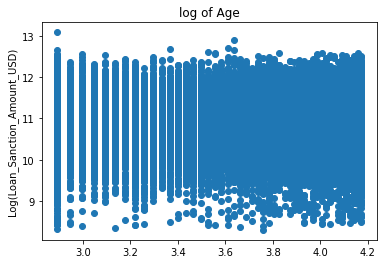

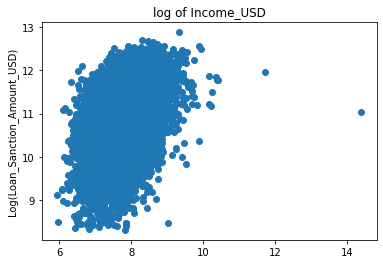

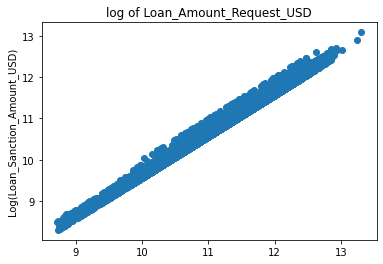

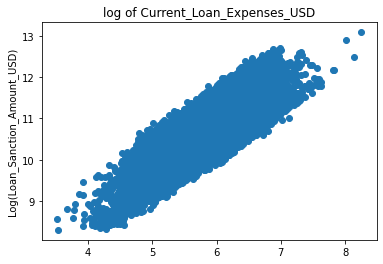

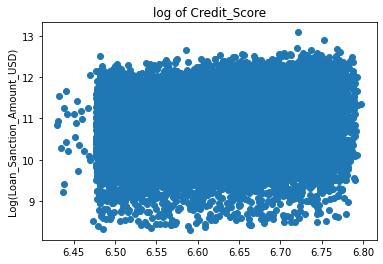

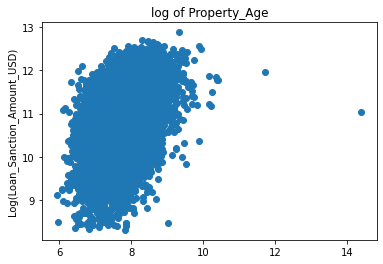

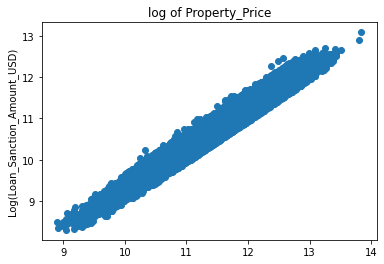

In [ ]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    dataset_copy=dataset.copy() #creating a copy
    if 0 in dataset_copy[feature].unique(): # 0 is undefined in log transformation
        pass
    else:
        dataset_copy[feature]=np.log(dataset_copy[feature]) #taking log transformation of feature
        dataset_copy['Loan_Sanction_Amount_USD']=np.log(dataset_copy['Loan_Sanction_Amount_USD']) #taking log transformation of Target variable
        plt.scatter(dataset_copy[feature],dataset_copy['Loan_Sanction_Amount_USD'])
        plt.ylabel('Log(Loan_Sanction_Amount_USD)')
        plt.title("log of "+ feature)
        plt.show()
        

**Observation:**

 we can take log transformation of the following : 
              
1)Loan_amount Request USD--

2)Current loan Expenses USD--

3)Property Price--

###Outliers in the Continuous Variable

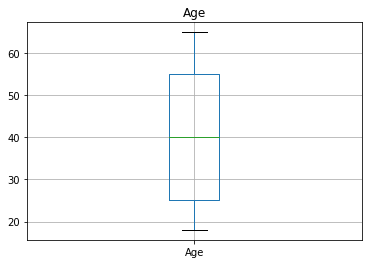

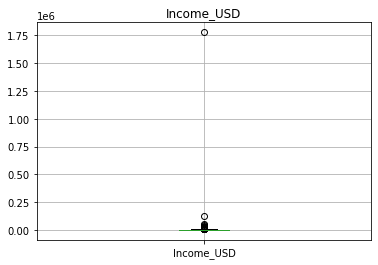

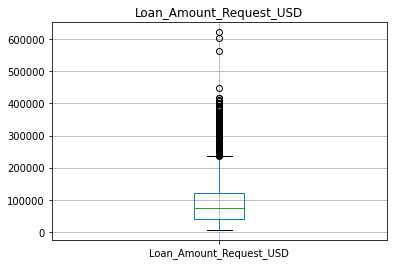

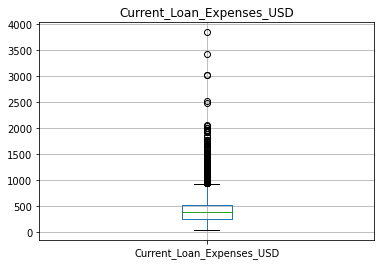

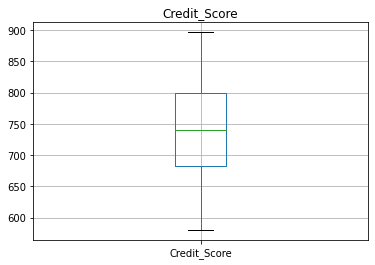

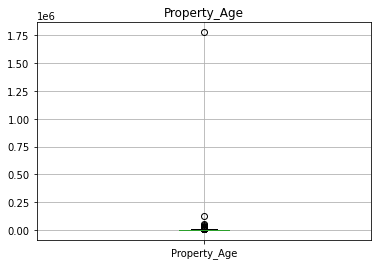

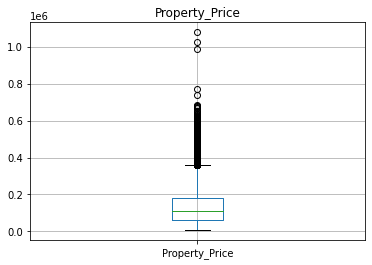

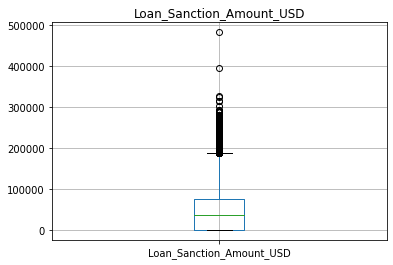

In [28]:
for feature in continuous_feature:
    dataset_copy=dataset.copy()# creating a copy
    dataset_copy.boxplot(column=feature) #boxplot of feature
    plt.title(feature)
    plt.show()
        

**Observation:**

All skewed features have many outliers.

#Outliers after taking log transformation

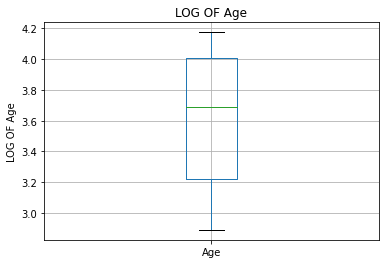

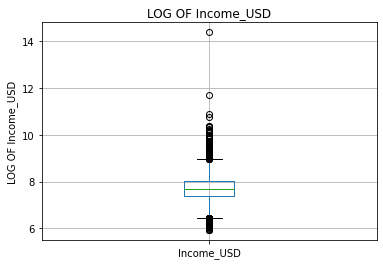

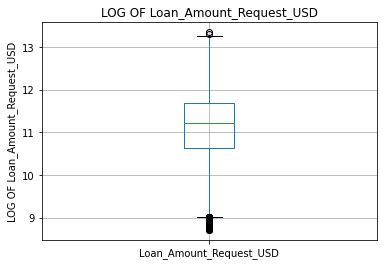

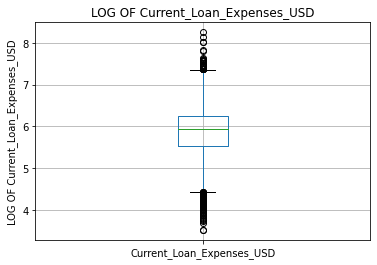

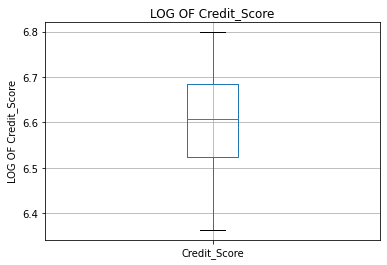

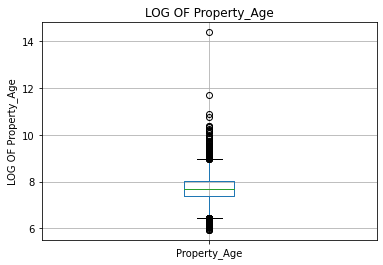

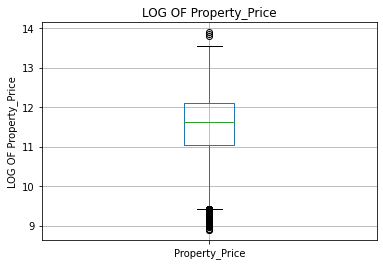

In [29]:
for feature in continuous_feature:
    dataset_copy=dataset.copy()
    if 0 in dataset_copy[feature].unique(): # cannot take log transformation of "0"
        pass
    else:
        dataset_copy[feature]=np.log(dataset_copy[feature]) #Taking log trasform of feature
        dataset_copy.boxplot(column=feature)#Drawing boxplot
        plt.ylabel("LOG OF " +feature)
        plt.title("LOG OF " +feature)
        plt.show()
        

**Observation:**

After taking the log transformation, the outliers in the skewed features("Loan_Amount_Request_USD" ,"Current_Loan_Expenses_USD","Property_Price") have reduced drastically.

But still "Current_Loan_Expenses_USD" have some outliers which needs to be addressed.

###Categorical Varibales

In [30]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O'] # categorical varibale have data type as "O"
categorical_features

['Gender',
 'Income_Stability',
 'Profession',
 'Type_of_Employment',
 'Location',
 'Expense_Type_1',
 'Expense_Type_2',
 'No._of_Defaults',
 'Has_Active_Credit_Card',
 'Property_Type',
 'Property_Location',
 'Co-Applicant']

In [31]:
dataset[categorical_features].head()

,Gender,Income_Stability,Profession,Type_of_Employment,Location,Expense_Type_1,Expense_Type_2,No._of_Defaults,Has_Active_Credit_Card,Property_Type,Property_Location,Co-Applicant
0,F,Low,Working,Sales staff,Semi-Urban,N,N,0,NaN,4,Rural,1.0
1,M,Low,Working,NaN,Semi-Urban,N,Y,0,Unpossessed,2,Rural,1.0
2,F,High,Pensioner,NaN,Semi-Urban,N,Y,0,Unpossessed,2,Urban,0.0
3,F,High,Pensioner,NaN,Rural,N,Y,1,Unpossessed,2,Semi-Urban,1.0
4,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,1,Active,4,Semi-Urban,1.0


In [68]:
for feature in categorical_features:
    print('The feature is **{} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is **Gender and number of categories are 3
The feature is **Income_Stability and number of categories are 3
The feature is **Profession and number of categories are 8
The feature is **Type_of_Employment and number of categories are 19
The feature is **Location and number of categories are 3
The feature is **Expense_Type_1 and number of categories are 2
The feature is **Expense_Type_2 and number of categories are 2
The feature is **No._of_Defaults and number of categories are 2
The feature is **Has_Active_Credit_Card and number of categories are 4
The feature is **Property_Type and number of categories are 4
The feature is **Property_Location and number of categories are 4
The feature is **Co-Applicant and number of categories are 3


**Observation :**

Here Type_of_Employment have many categories(i.e. 19)

####**Lets find out the relationship between categorical variable and dependent feature Loan_Sanction_Amount_USD**

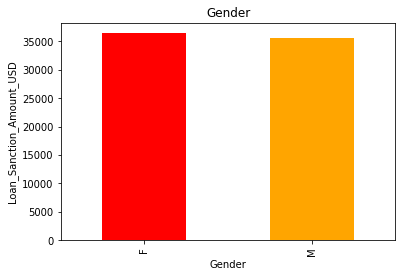

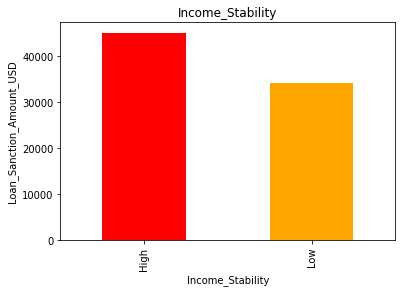

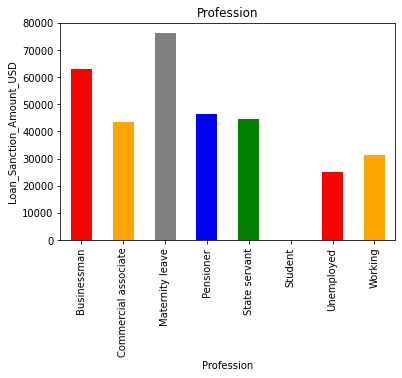

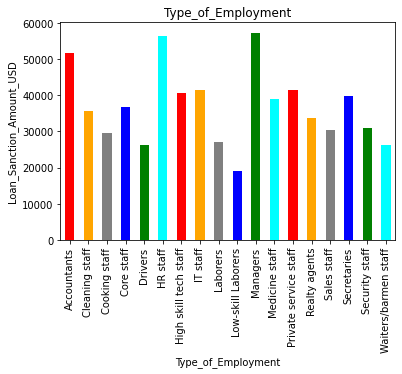

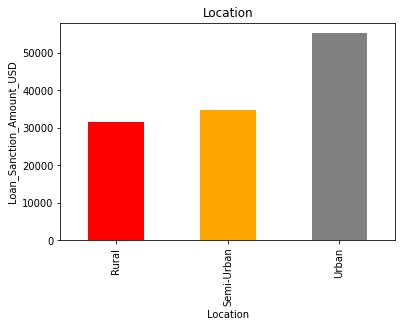

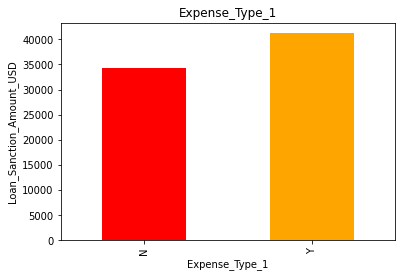

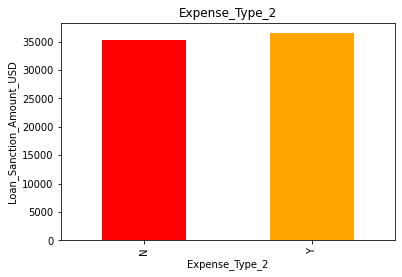

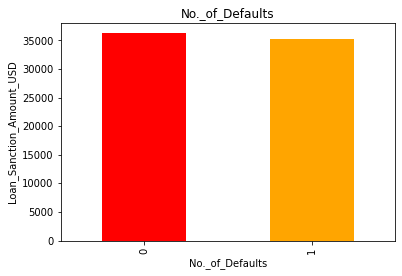

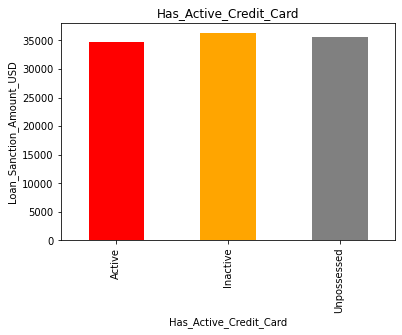

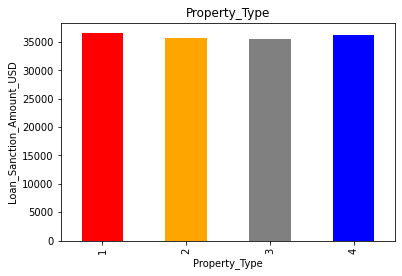

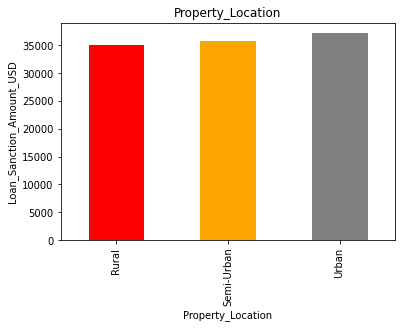

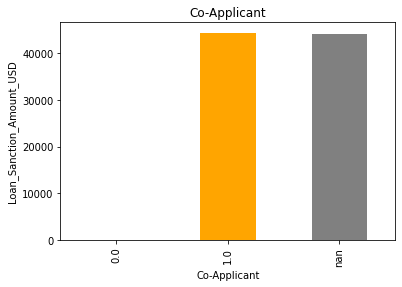

In [33]:
c = ['red', 'orange', 'gray', 'blue', 'green','cyan']
for feature in categorical_features:
    dataset_copy=dataset.copy()
    dataset_copy.groupby(feature)['Loan_Sanction_Amount_USD'].median().plot.bar(color=c) #Median value
    plt.ylabel('Loan_Sanction_Amount_USD')
    plt.title(feature)
    plt.show()

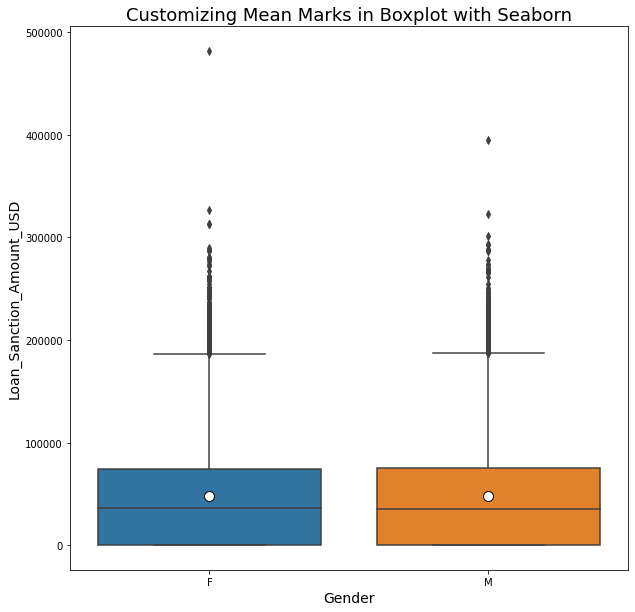

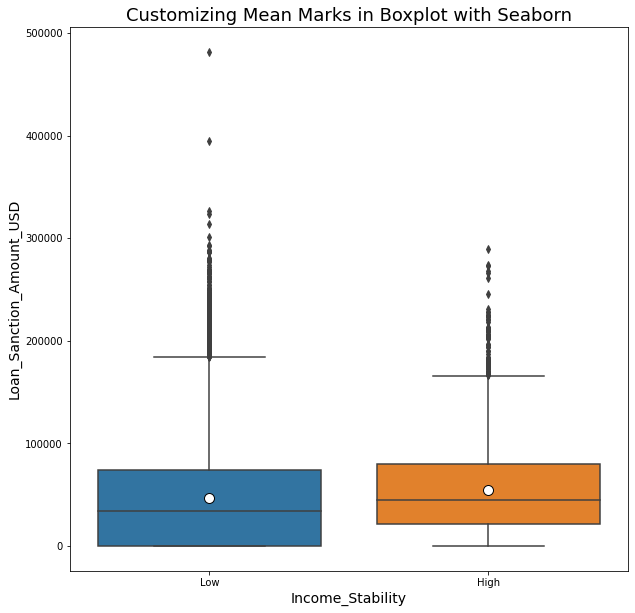

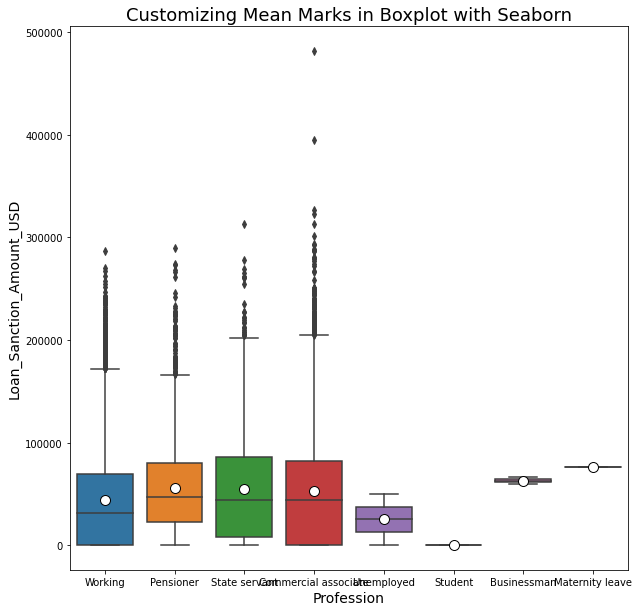

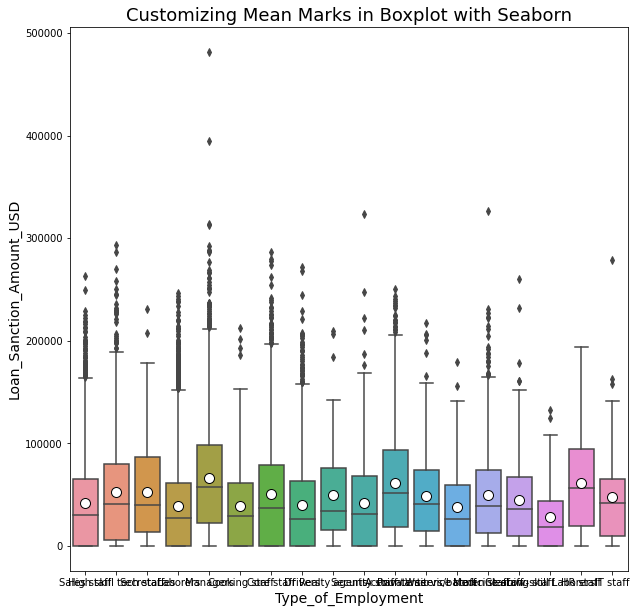

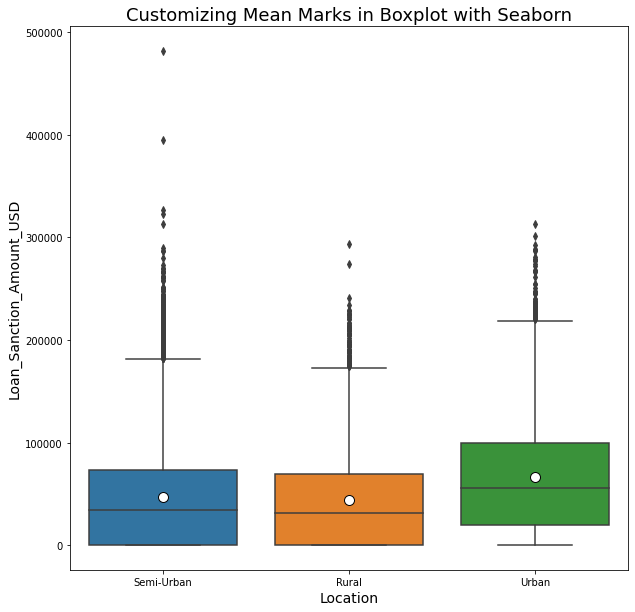

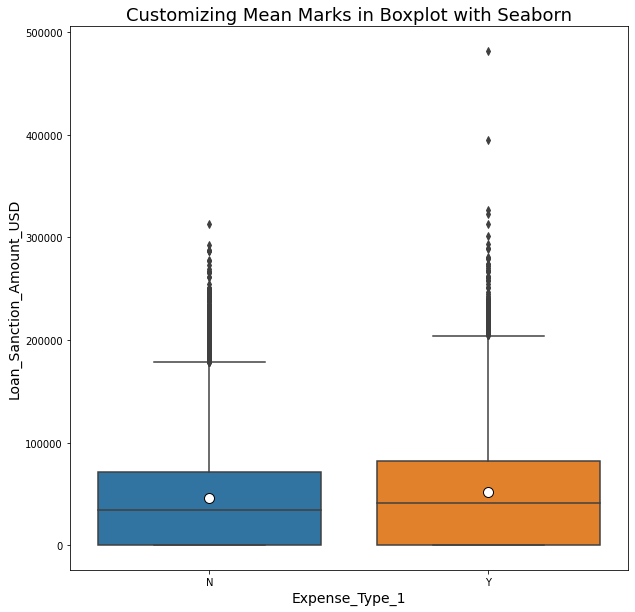

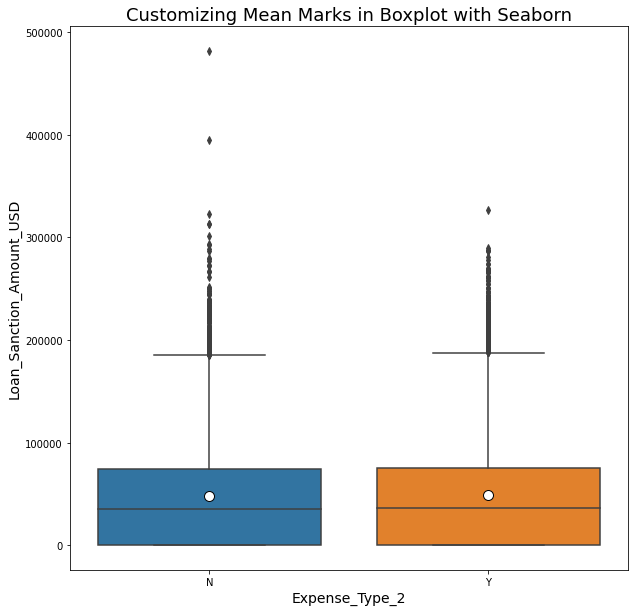

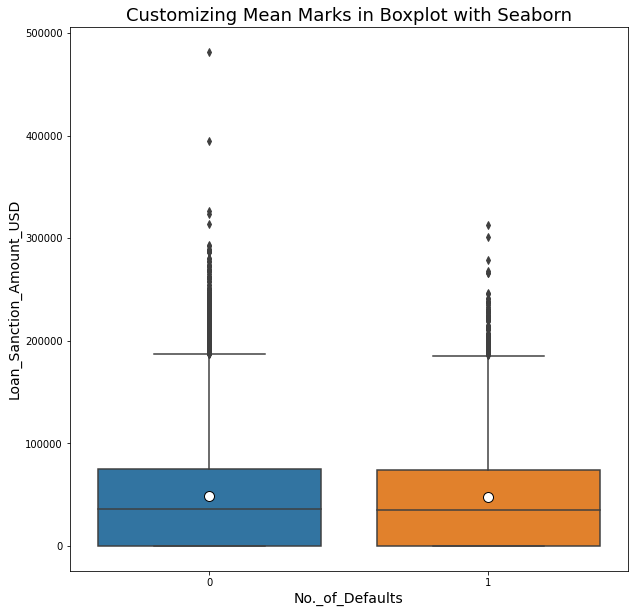

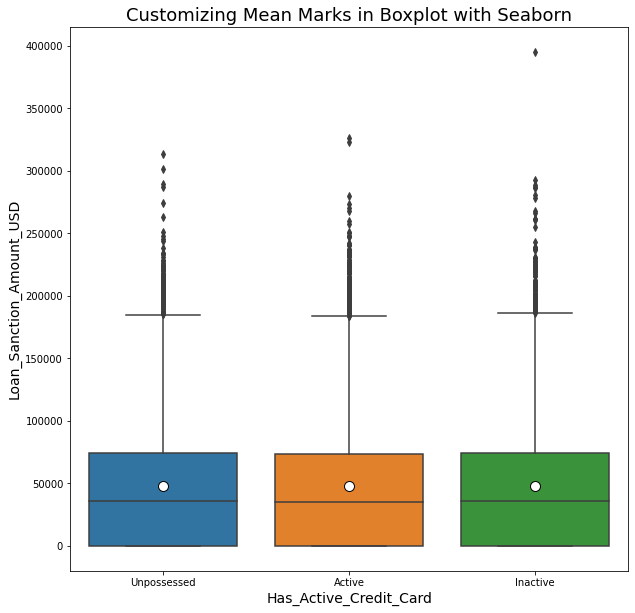

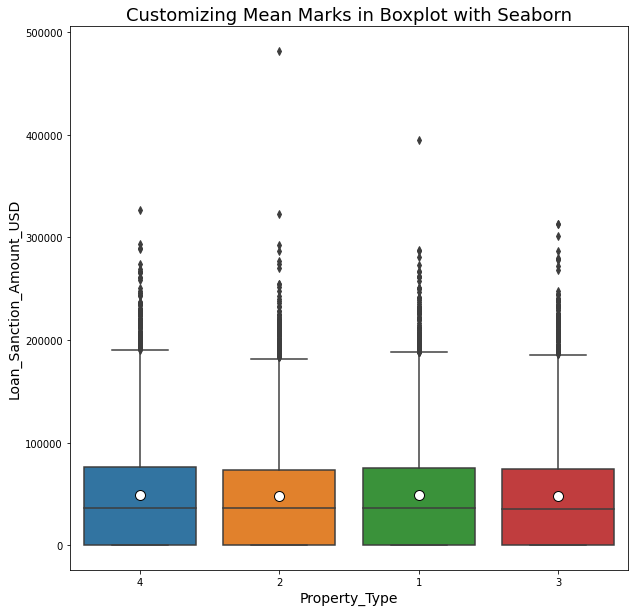

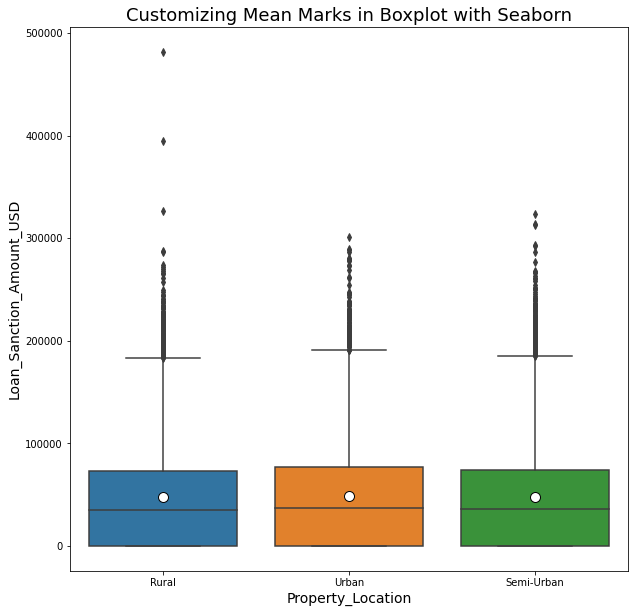

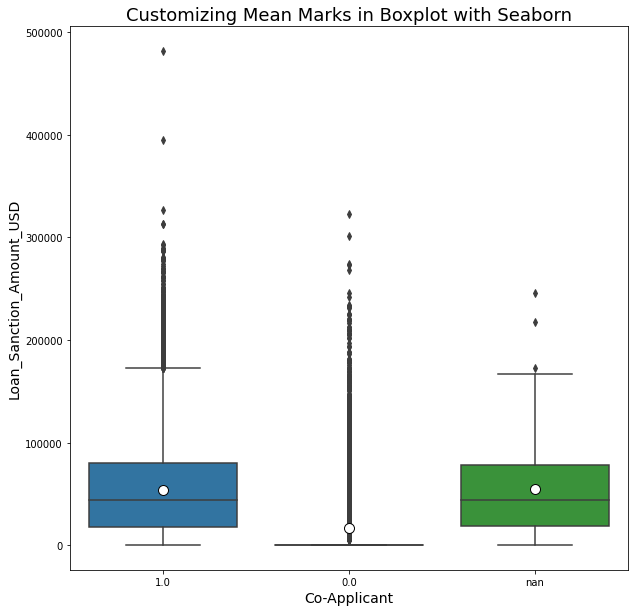

In [34]:
#https://datavizpyr.com/show-mean-mark-on-boxplot-using-seaborn-in-python/
for feature in categorical_features:

  plt.figure(figsize=(10, 10))
  sns.boxplot(x=feature,
              y="Loan_Sanction_Amount_USD", 
              data=dataset, 
              showmeans=True,
              meanprops={"marker":"o",
                        "markerfacecolor":"white", 
                        "markeredgecolor":"black",
                        "markersize":"10"})
  plt.ylabel("Loan_Sanction_Amount_USD", size=14)
  plt.xlabel(feature, size=14)
  plt.title("Customizing Mean Marks in Boxplot with Seaborn", size=18)

#Observation for Co-Applicant:
The interesting thing that can be found here is.. if "Co-Appicant" is "0" then "Loan_Sanction_Amount_USD" is also "0".


However , is it true?? as the co-applicant have only 0.26 correlation with loan_sanction amount, we have to find out how the median value is 0?

#Lets so some more analysis on Co-Applicants

In [35]:
df11=dataset_copy.groupby('Co-Applicant')['Loan_Sanction_Amount_USD'].apply(lambda x: (x==0).sum()).reset_index(name='count') #Count where Loan_Sanction Amount is 0
print (df11)

  Co-Applicant  count
0          0.0   3207
1          1.0   4631
2          nan     27


In [36]:
df11=dataset_copy.groupby('Co-Applicant')['Loan_Sanction_Amount_USD'].apply(lambda x: (x>0).sum()).reset_index(name='count') #Count where Loan_Sanction Amount is greater than 0
print (df11)

  Co-Applicant  count
0          0.0   1061
1          1.0  20263
2          nan    133


Text(0.5, 1.0, 'Co-Applicant if the Loan_Sanction_Amount_USD ==0')

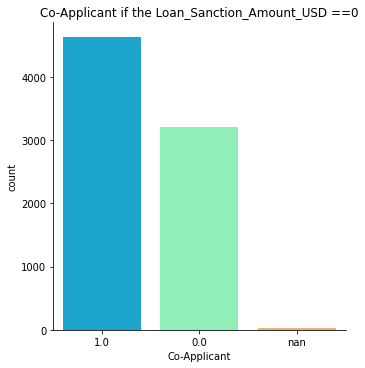

In [37]:
sns.catplot(x="Co-Applicant", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']==0)])
plt.title("Co-Applicant if the Loan_Sanction_Amount_USD ==0")

Text(0.5, 1.0, 'Co-Applicant if the Loan_Sanction_Amount_USD >0')

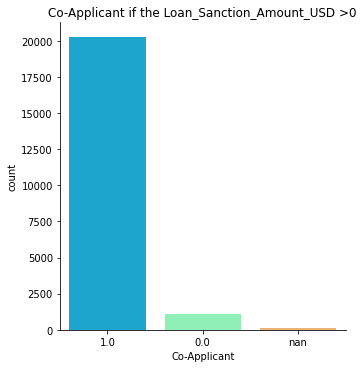

In [38]:
sns.catplot(x="Co-Applicant", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']>0)])
plt.title("Co-Applicant if the Loan_Sanction_Amount_USD >0")

#Observation for Co-Applicant:

**When Co-Applicant is 0 :** 

**Count of Loan_Sanction_Amount ==0  is 3207  and Count of Loan_Snaction_Amount >0  is 1061 . Thats the main reason why we are getting median as 0**

###**Observation for other categorical variables:**
1) If your "income stability" is low then loan sanction amount will be less.

2) High amount Loan can be sanctioned when anyone have "Maternity Leave" .

3) IF your "Type of Employment" is Accountants,HR staff and Manger , then loan sanction amount can be high.

4) IF you live in "Urban area" then loan sanction amount can be high.

5) There is not any difference observed in "gender" vs "Loan Sanction Amount".

6)"Expense Type 1" have some impact on Target variable as the median values of "Loan_Sanction_Amount_USD" varies in both the expense type(0 and 1).

7)"Expense_Type_2" ,"Property Type", and "Has_Active_Credit_Card" are  not adding any value in predicting the Target variable as the median value of "Loan_Sanction_Amount_USD" are almost same.


One interesting thing to note here  is if we are "Student" then we have no chance or very less chance to get loan.


Other than this all other categorical features doesnt show any significant difference in analysis of Loan Sanction amount.

#**Lets check KDE plot to get usefullness of categorical variable**

**1)Location :**

<Figure size 720x720 with 0 Axes>

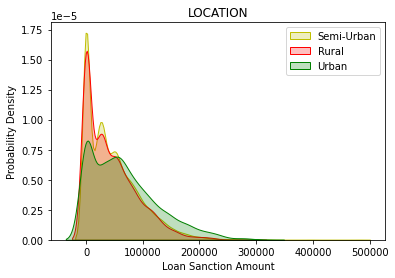

<Figure size 720x720 with 0 Axes>

In [95]:

sns.kdeplot(dataset_copy.loc[(dataset_copy['Location']=="Semi-Urban"),
            'Loan_Sanction_Amount_USD'], color='y', shade=True, Label='Semi-Urban')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Location']=="Rural"),
            'Loan_Sanction_Amount_USD'], color='r', shade=True, Label='Rural')

sns.kdeplot(dataset_copy.loc[(dataset_copy['Location']=="Urban"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='Urban')

plt.title("LOCATION")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**2)Gender:**

<Figure size 720x720 with 0 Axes>

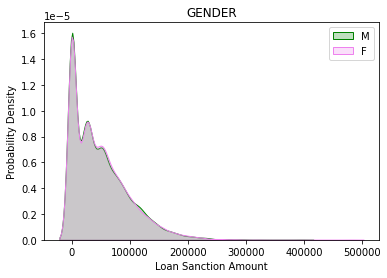

<Figure size 720x720 with 0 Axes>

In [94]:
sns.kdeplot(dataset_copy.loc[(dataset_copy['Gender']=="M"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='M')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Gender']=="F"),
            'Loan_Sanction_Amount_USD'], color='violet', shade=True, Label='F')

plt.title("GENDER")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**3)Income_Stability:**

<Figure size 720x720 with 0 Axes>

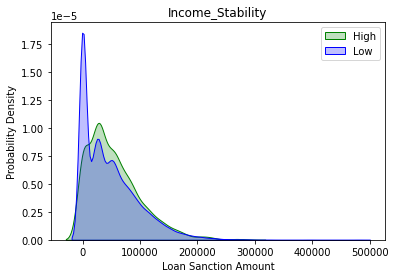

<Figure size 720x720 with 0 Axes>

In [96]:
sns.kdeplot(dataset_copy.loc[(dataset_copy['Income_Stability']=="High"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='High')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Income_Stability']=="Low"),
            'Loan_Sanction_Amount_USD'], color='blue', shade=True, Label='Low')

plt.title("Income_Stability")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**4)Expense_Type_1**

<Figure size 720x720 with 0 Axes>

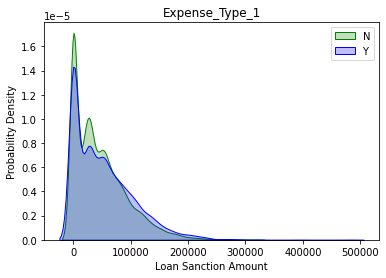

<Figure size 720x720 with 0 Axes>

In [97]:
sns.kdeplot(dataset_copy.loc[(dataset_copy['Expense_Type_1']=="N"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='N')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Expense_Type_1']=="Y"),
            'Loan_Sanction_Amount_USD'], color='blue', shade=True, Label='Y')

plt.title("Expense_Type_1")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**5)Expense_Type_2**

<Figure size 720x720 with 0 Axes>

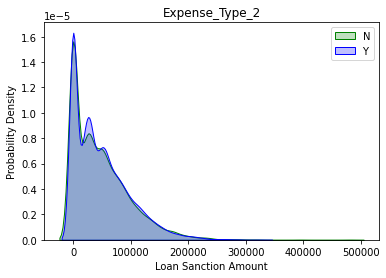

<Figure size 720x720 with 0 Axes>

In [98]:
sns.kdeplot(dataset_copy.loc[(dataset_copy['Expense_Type_2']=="N"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='N')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Expense_Type_2']=="Y"),
            'Loan_Sanction_Amount_USD'], color='blue', shade=True, Label='Y')

plt.title("Expense_Type_2")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**6)No._of_Defaults**

<Figure size 720x720 with 0 Axes>

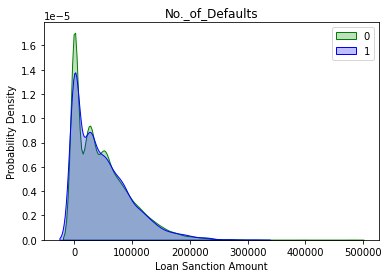

<Figure size 720x720 with 0 Axes>

In [99]:

sns.kdeplot(dataset_copy.loc[(dataset_copy['No._of_Defaults']=="0"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='0')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['No._of_Defaults']=="1"),
            'Loan_Sanction_Amount_USD'], color='blue', shade=True, Label='1')

plt.title("No._of_Defaults")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))


**7) Has_Active_Credit_Card**

<Figure size 720x720 with 0 Axes>

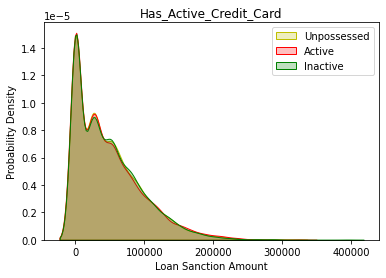

<Figure size 720x720 with 0 Axes>

In [101]:


sns.kdeplot(dataset_copy.loc[(dataset_copy['Has_Active_Credit_Card']=="Unpossessed"),
            'Loan_Sanction_Amount_USD'], color='y', shade=True, Label='Unpossessed')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Has_Active_Credit_Card']=="Active"),
            'Loan_Sanction_Amount_USD'], color='r', shade=True, Label='Active')

sns.kdeplot(dataset_copy.loc[(dataset_copy['Has_Active_Credit_Card']=="Inactive"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='Inactive')

plt.title("Has_Active_Credit_Card")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**8)Property Type**

<Figure size 720x720 with 0 Axes>

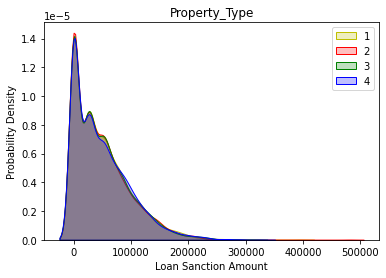

<Figure size 720x720 with 0 Axes>

In [102]:

sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Type']=="1"),
            'Loan_Sanction_Amount_USD'], color='y', shade=True, Label='1')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Type']=="2"),
            'Loan_Sanction_Amount_USD'], color='r', shade=True, Label='2')

sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Type']=="3"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='3')

sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Type']=="4"),
            'Loan_Sanction_Amount_USD'], color='b', shade=True, Label='4')

plt.title("Property_Type")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**8)Property Location**

<Figure size 720x720 with 0 Axes>

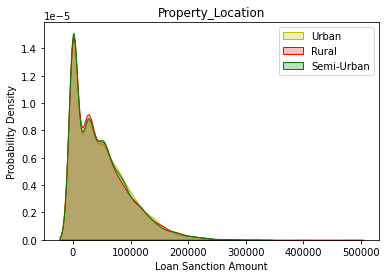

<Figure size 720x720 with 0 Axes>

In [103]:

sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Location']=="Urban"),
            'Loan_Sanction_Amount_USD'], color='y', shade=True, Label='Urban')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Location']=="Rural"),
            'Loan_Sanction_Amount_USD'], color='r', shade=True, Label='Rural')

sns.kdeplot(dataset_copy.loc[(dataset_copy['Property_Location']=="Semi-Urban"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='Semi-Urban')

plt.title("Property_Location")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

**9)Co-Applicant**

<Figure size 720x720 with 0 Axes>

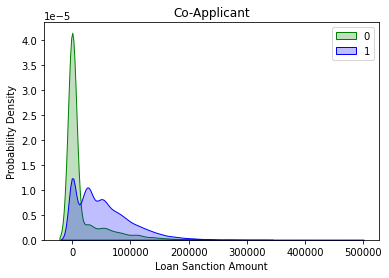

<Figure size 720x720 with 0 Axes>

In [104]:
sns.kdeplot(dataset_copy.loc[(dataset_copy['Co-Applicant']=="0.0"),
            'Loan_Sanction_Amount_USD'], color='g', shade=True, Label='0')
  
sns.kdeplot(dataset_copy.loc[(dataset_copy['Co-Applicant']=="1.0"),
            'Loan_Sanction_Amount_USD'], color='blue', shade=True, Label='1')

plt.title("Co-Applicant")
plt.xlabel('Loan Sanction Amount')
plt.ylabel('Probability Density')
plt.legend()
plt.figure(figsize=(10, 10))

#Useful features From KDE plots for categorical variable:

**1) Co-Applicant**

**2)No._of_Defaults**

**3)Expense_Type_1**

**4)Income_Stability**

**5)Location**

#**Extra Analysis**

**Q. How Income Stability behave with the age ?**

Text(0.5, 1.0, 'Income stability(18 years old)')

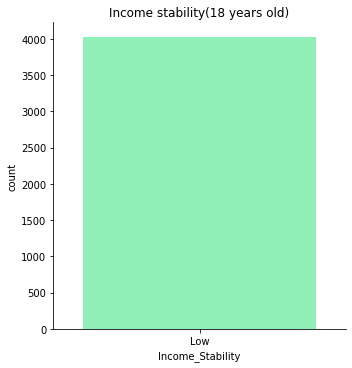

In [39]:
sns.catplot(x="Income_Stability", kind="count", palette="rainbow", data=data_copy[(data_copy.Age == 18)])
plt.title("Income stability(18 years old)")

Text(0.5, 1.0, 'Income stability(between 18 and 64 years old)')

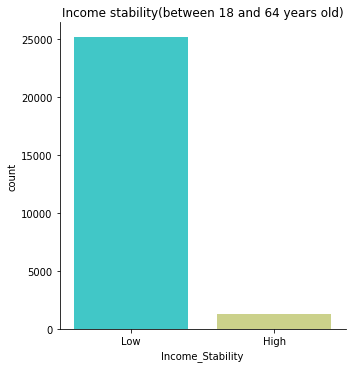

In [40]:
sns.catplot(x="Income_Stability", kind="count", palette="rainbow", data= data_copy[(data_copy['Age']>=18) & (data_copy['Age']<=64)])
plt.title("Income stability(between 18 and 64 years old)")

Text(0.5, 1.0, 'Income stability(65 years old)')

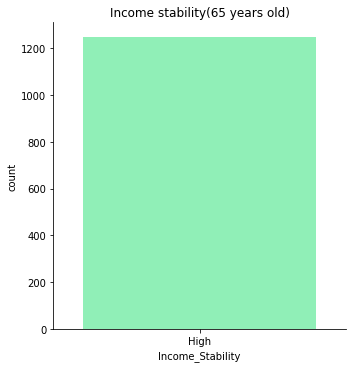

In [41]:
sns.catplot(x="Income_Stability", kind="count", palette="rainbow", data= data_copy[data_copy['Age']==65])
plt.title("Income stability(65 years old)")

**From the above analysis we can say that age does matter in income stability as if your age==18--> Income_Stability is low  and if your age is ==65 -->Income stability will be high**

**If your age is in between 18 and 64 -- > Income stability is low for most of the people and is high for very few people**

#**Q. How many datapoints are there with Profession =="Student"**

In [42]:
data_copy[data_copy["Profession"]=="Student"]

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
7886,M,36,1914.58,NaN,Student,NaN,Semi-Urban,58056.11,345.2,N,N,1.0,637.14,1,Inactive,1914.58,1,Rural,1.0,68168.07,0.0


**There is Only 1 datapoint with profession as Student:** -- > We can remove this row in our later analysis

#**Q. How many datapoints are there with Profession =="Unemployed"**

In [43]:
data_copy[data_copy["Profession"]=="Unemployed"]

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
7255,M,39,805.37,High,Unemployed,NaN,Rural,89038.91,330.10,N,N,3.0,704.47,0,Active,805.37,2,Semi-Urban,0.0,133729.27,0.00
13854,M,52,NaN,High,Unemployed,NaN,Semi-Urban,77097.81,218.18,Y,Y,3.0,666.12,1,Unpossessed,NaN,1,Urban,1.0,120857.18,50113.58


**There are Only 2 datapoint with profession as "Unemployed":** -- > We can remove this row in our later analysis

#**Q. How many datapoints are there with Profession =="Maternity_Leave"**

In [44]:
data_copy[data_copy["Profession"]=="Maternity leave"]

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
21822,F,62,NaN,Low,Maternity leave,NaN,Urban,108967.56,1092.04,N,N,2.0,878.49,0,NaN,NaN,3,Semi-Urban,1.0,199761.32,76277.29


**There is Only 1 datapoint with profession as Maternity_leave:** -- > We can remove this row in our later analysis as Maternity Leave is not a profession

#**Q . How many datapoints are there with dependents>=10 ?**

In [45]:
data_copy[data_copy["Dependents"]>=10]

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
10913,F,46,2714.12,Low,Commercial associate,Sales staff,Semi-Urban,99542.76,486.28,N,N,10.0,654.18,0,Inactive,2714.12,4,Semi-Urban,1.0,109647.12,64702.79
21604,F,59,4578.00,Low,Commercial associate,Core staff,Urban,108099.74,923.72,N,Y,14.0,791.70,1,Active,4578.00,3,Urban,0.0,186303.68,0.00


#**Q. How Number of dependents vaires with location?** 

Text(0.5, 1.0, 'Loan amount requested if the Dependents==1')

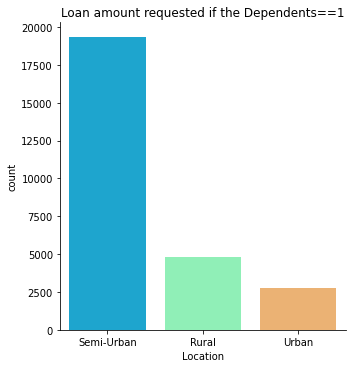

In [46]:
sns.catplot(x="Location", kind="count", palette="rainbow", data= data_copy[(data_copy['Dependents']>=1)&(data_copy['Dependents']<=10)])
plt.title("Loan amount requested if the Dependents==1")

Text(0.5, 1.0, 'Loan amount requested if the Dependents==1')

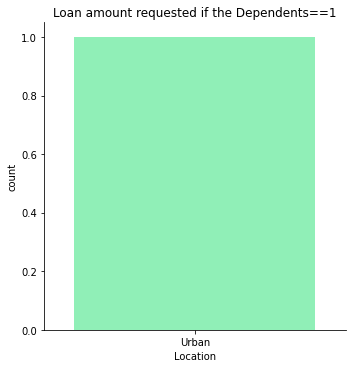

In [47]:
sns.catplot(x="Location", kind="count", palette="rainbow", data= data_copy[(data_copy['Dependents']>10)&(data_copy['Dependents']<=14)])
plt.title("Loan amount requested if the Dependents==1")

**Observation:**

**Most of the people are from Semi-Urban area if Number of Dependents<10**

**Interesting thing is if Number of dependents>10 , then all the people belong to Urban area**

#**Q . How "Location" change with "Loan_Sanction_Amount_USD"?**

Text(0.5, 1.0, 'Location when Loan_Sanction Amount = 0')

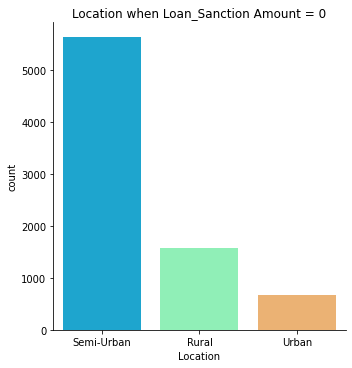

In [48]:
sns.catplot(x="Location", kind="count" ,palette="rainbow", data= data_copy[(data_copy['Loan_Sanction_Amount_USD']==0)])
plt.title("Location when Loan_Sanction Amount = 0")

Text(0.5, 1.0, 'Location when Loan_Sanction Amount < 400000')

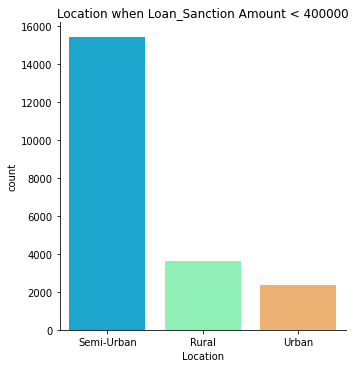

In [49]:
sns.catplot(x="Location", kind="count", palette="rainbow", data= data_copy[(data_copy['Loan_Sanction_Amount_USD']>0) &(data_copy['Loan_Sanction_Amount_USD']<400000)])
plt.title("Location when Loan_Sanction Amount < 400000")

Text(0.5, 1.0, 'Location when Loan_Sanction Amount > 400000')

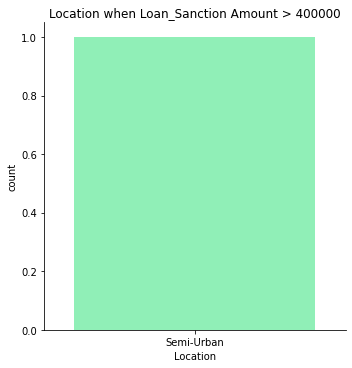

In [50]:
sns.catplot(x="Location", kind="count", palette="rainbow", data= data_copy[(data_copy['Loan_Sanction_Amount_USD']>400000)])
plt.title("Location when Loan_Sanction Amount > 400000")

##**Observations :**

1) Most of the people live in Semi-Urban Area whose loan amount have been sanctioned or not.



In [51]:
data_copy[data_copy["Loan_Sanction_Amount_USD"]>400000]

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
7787,F,18,NaN,Low,Commercial associate,Managers,Semi-Urban,602384.15,3840.88,Y,N,4.0,830.04,0,NaN,NaN,2,Rural,1.0,1028082.64,481907.32


#Observation:

There is only 1 datapoint where loan_Amount_Sanction > 400000 

Got an idea --> We can fill out the missing values with median value using different bins of loan_Sanction_Amount_USD

E.g  --> Take median of the values where loan_Sanction_Amount_USD < 100000 

and median values where  (loan_Sanction_Amount_USD > 100000  && loan_Sanction_Amount_USD > 200000)

and median values where  (loan_Sanction_Amount_USD > 200000  && loan_Sanction_Amount_USD < 300000)

and median values where  loan_Sanction_Amount_USD > 300000

#**Now lets see how different "Profession" behaves with Loan sanction amount**

**Label encoding of feature "Profession"
Businessman -> 0**

**Commercial associate --> 1**

**Maternity Leave --> 2**

**Pensioner -- > 3**

**State Servant --> 4**

**Student -->5**

**Unemployed --> 6**

**Working --> 7**


In [52]:

dataset_copy['Profession']=dataset_copy['Profession'].replace('Businessman','0')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Commercial associate','1')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Maternity leave','2')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Pensioner','3')
dataset_copy['Profession']=dataset_copy['Profession'].replace('State servant','4')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Student','5')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Unemployed','6')
dataset_copy['Profession']=dataset_copy['Profession'].replace('Working','7')


Text(0.5, 1.0, 'Profession when Loan_Sanction Amount = 0')

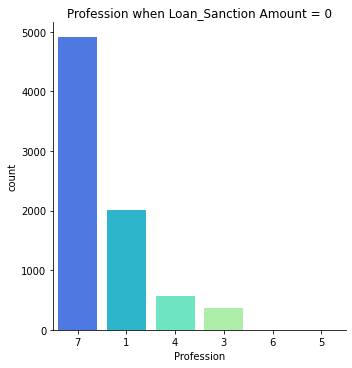

In [53]:
sns.catplot(x="Profession", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']==0)])
plt.title("Profession when Loan_Sanction Amount = 0")

Text(0.5, 1.0, 'Profession when Loan_Sanction Amount > 0 and <100000')

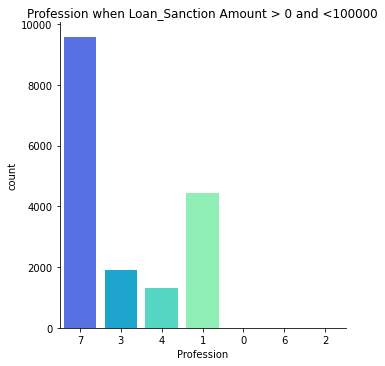

In [106]:
sns.catplot(x="Profession", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']>0) & (dataset_copy['Loan_Sanction_Amount_USD']<100000)])
plt.title("Profession when Loan_Sanction Amount > 0 and <100000")

Text(0.5, 1.0, 'Profession when Loan_Sanction Amount > 10000 and <200000')

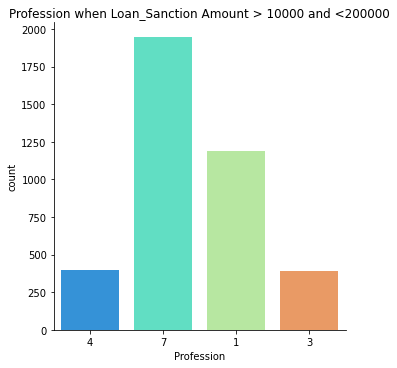

In [107]:
sns.catplot(x="Profession", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']>100000) & (dataset_copy['Loan_Sanction_Amount_USD']<200000)])
plt.title("Profession when Loan_Sanction Amount > 10000 and <200000")

Text(0.5, 1.0, 'Profession when Loan_Sanction Amount > 200000 and <300000')

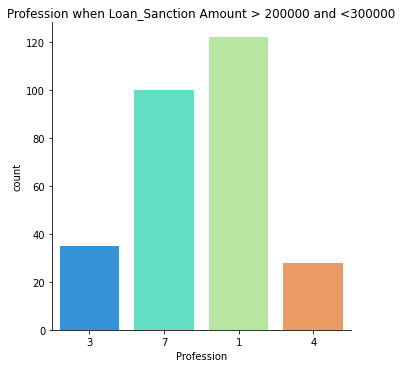

In [108]:
sns.catplot(x="Profession", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']>200000) & (dataset_copy['Loan_Sanction_Amount_USD']<300000)])
plt.title("Profession when Loan_Sanction Amount > 200000 and <300000")

Text(0.5, 1.0, 'Profession when Loan_Sanction Amount >300000')

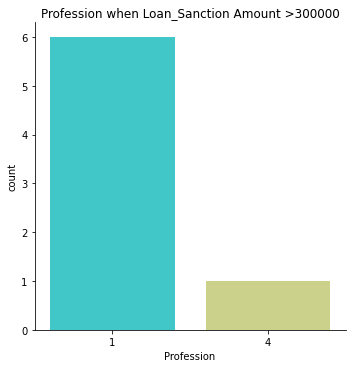

In [105]:
sns.catplot(x="Profession", kind="count", palette="rainbow", data= dataset_copy[(dataset_copy['Loan_Sanction_Amount_USD']>300000)])
plt.title("Profession when Loan_Sanction Amount >300000")

##**Observations:

**1) Whose Loan_Sanction_Amount_USD==0 are mostly "Working" or "Commercial associates"**

**2) If the loan_Sanction_Amount > 300000 , then the professions are "Commercial associates" and "State_Servants"**

I believe that "Profession and "Type of Employment" does play much role in predicting the Loan_Sanction_Amount_USD

In [57]:
dataset_copy.describe()

,Age,Income_USD,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,Property_Age,Property_Price,Loan_Sanction_Amount_USD
count,29322.000000,2.491100e+04,29322.000000,28990.000000,26920.000000,27681.000000,2.464900e+04,2.898900e+04,29322.000000
mean,40.119910,2.631891e+03,88779.817302,409.082148,2.254049,739.898843,2.632181e+03,1.332445e+05,48210.120452
std,16.054988,1.137630e+04,59469.836598,217.613817,0.951468,72.168172,1.143538e+04,9.280234e+04,48212.938805
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.000000,3.777000e+02,7.265950e+03,0.000000
25%,25.000000,1.650435e+03,41182.645000,250.677500,2.000000,681.870000,1.649830e+03,6.193793e+04,0.000000
50%,40.000000,2.222860e+03,75094.785000,376.350000,2.000000,739.910000,2.223610e+03,1.112606e+05,36064.225000
75%,55.000000,3.090330e+03,119895.552500,522.307500,3.000000,799.120000,3.090870e+03,1.800423e+05,74779.277500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.777460e+06,1.077967e+06,481907.320000
